# RAO3 Algorithm

Name : Dawwi Raissa Damarjati Muljana
SID : 1301213517

# Kode

In [53]:
#importing
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from tqdm import tqdm

# Fungsi F14 

In [54]:
def F14(x):
    aS = np.array([
        [-32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32, -32, -16, 0, 16, 32],
        [-32, -32, -32, -32, -32, -16, -16, -16, -16, -16, 0, 0, 0, 0, 0, 16, 16, 16, 16, 16, 32, 32, 32, 32, 32]
    ])
    # Ensure x is reshaped to (2, 1)
    x = x.reshape(2, 1)
    bS = np.sum((x - aS) ** 6, axis=0)
    return (1 / 500 + np.sum(1 / (np.arange(1, 26) + bS))) ** -1

# Parameters

In [55]:
pop_size = 75
iterations = 100
bounds = [-50, 100]

In [56]:
# Inisialisasi populasi awal secara acak
# np.random.seed(20)
population = np.random.uniform(bounds[0], bounds[1], (pop_size, 2))

In [57]:
# Function to calculate fitness
def calculate_fitness(population):
    return np.array([F14(individual) for individual in population])

In [58]:
fitness = calculate_fitness(population)
print(fitness)

[499.99997269 499.99999084 395.67923806 494.22605519  14.47889363
 483.25862616 499.99998596 499.99997217 499.99998775 499.99995095
 496.44307919 499.97815376 499.98338267 499.99993677 499.99914341
 499.99997334 497.47511538 499.99980169 114.82778546 499.99985441
 499.9949111  499.99855056 499.99582517 499.71220081 499.93766559
 499.99870985 499.99921224 499.99973066 499.99725002 499.99545968
 499.96597801 497.93458144 497.40002294 421.61701402 499.96359261
 499.97862601 499.99987526 499.99924039 499.99944924 499.9997646
 499.99997436 497.88663826 499.96493554 499.99997616 499.98585779
 499.99987387 499.99742552 499.9575907  499.98202732 499.99181361
 455.17804668 498.87773008 499.85169922 499.96377084 499.97264222
 499.79164531 499.99890042 499.99954975 499.99970868 495.66823145
 499.99304442 499.98900444 497.76372755 479.09164389 499.99755325
 498.02280328   1.18837107 491.21989887 499.99997365 457.17579128
 499.99997055 496.34822875 499.99998013 499.99996801 499.99938215]


# RAO3 Alogrithm

In [59]:
# Define the RAO3 algorithm

# Run RAO3

In [60]:
def RAO3(pop_size, iterations, bounds, fobj):
    # Initialize population
    population = np.random.uniform(bounds[0], bounds[1], (pop_size, len(bounds)))
    fitness = np.array([fobj(ind) for ind in population])
    best_sol = population[np.argmin(fitness)]
    worst_sol = population[np.argmax(fitness)]
    
    history = [population.copy()]
    
    for _ in tqdm(range(iterations), desc="Progress", colour="green"):
        for i in range(pop_size):
            k = np.random.randint(pop_size)
            r1, r2 = np.random.random(), np.random.random()
            
            if fobj(population[i]) < fobj(population[k]):
                new_sol = population[i] + r1 * (best_sol - np.abs(worst_sol)) + r2 * (np.abs(population[i]) - population[k])
            else:
                new_sol = population[i] + r1 * (best_sol - np.abs(worst_sol)) + r2 * (np.abs(population[k]) - population[i])
            
            new_sol = np.clip(new_sol, bounds[0], bounds[1])
            
            if fobj(new_sol) < fobj(population[i]):
                population[i] = new_sol
        
        fitness = np.array([fobj(ind) for ind in population])
        best_sol = population[np.argmin(fitness)]
        worst_sol = population[np.argmax(fitness)]
        history.append(population.copy())
    
    return history, best_sol

# Call the RAO3 function with the F14 function as the objective function
history, best_solution = RAO3(pop_size, iterations, bounds, F14)

# Output the best solution found
print("Best solution:", best_solution)

Progress: 100%|██████████| 100/100 [00:00<00:00, 116.77it/s]

Best solution: [-31.88567281 -32.30344469]


# Plotting solution space

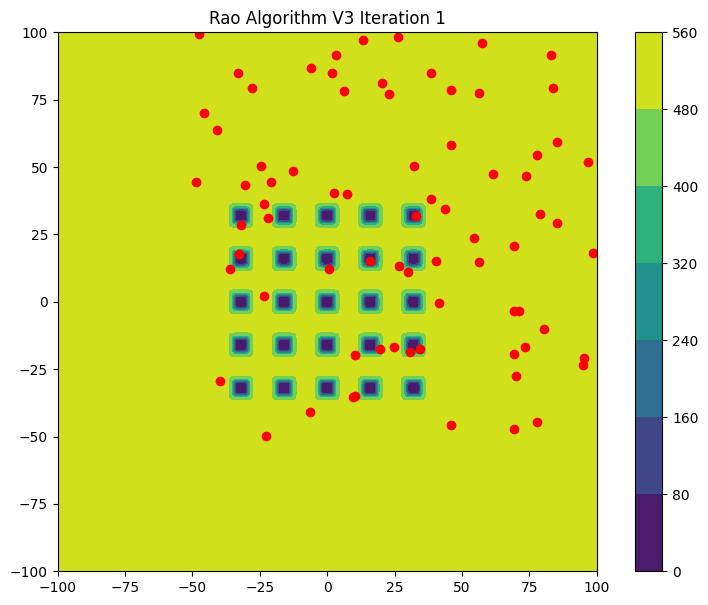

In [61]:
# Prepare contour plot data
bounds1 = -100
bounds2 = 100
X1 = np.linspace(bounds1, bounds2, 400)
X2 = np.linspace(bounds1, bounds2, 400)
X1, X2 = np.meshgrid(X1, X2)
Z = np.array([F14(np.array([x1, x2])) for x1, x2 in zip(X1.ravel(), X2.ravel())]).reshape(X1.shape)

# Set up the plot and axes for animation
fig, ax = plt.subplots(figsize=(10, 7))
ax.set_xlim(bounds1, bounds2)
ax.set_ylim(bounds1, bounds2)
contour = ax.contourf(X1, X2, Z, cmap='viridis')
fig.colorbar(contour, ax=ax)
scatter = ax.scatter([], [], c='red')  # Solution candidates

# Menyelaraskan sumbu untuk membuat plot simetris
ax.set_aspect('equal')

# Update function for animation
def update(frame):
    positions = history[frame]
    scatter.set_offsets(positions)
    ax.set_title(f'Rao Algorithm V3 Iteration {frame + 1}')
    return scatter,

ani = FuncAnimation(fig, update, frames=len(history), blit=True, repeat=False)

# Show animation
plt.show()


# Saving GIF

In [62]:
# Manage run count
run_count_file = 'run_count_gen5.txt'

# Read current run count
try:
    with open(run_count_file, 'r') as f:
        run_count = int(f.read().strip())
except FileNotFoundError:
    run_count = 0

# Increment run count
run_count += 1

# Save new run count
with open(run_count_file, 'w') as f:
    f.write(str(run_count))

# Save the animation as a GIF with incremented name
gif_filename = f'RAO3-Gen5.{run_count}..gif'
ani.save(gif_filename, writer=PillowWriter(fps=2))

plt.show()